### Q1 Ploting The Data Points

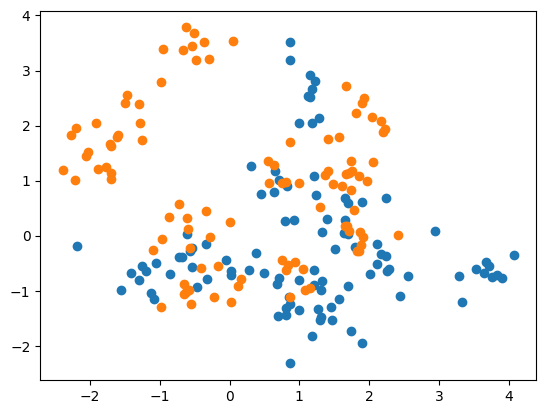

In [141]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

mean = [1, 0]
cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(mean, cov, 10)
mean1 = [0,1]
m1 = np.random.multivariate_normal(mean1, cov, 10) # Another two dimensional vector with mean[0,1] and covariance same as above.
# print (m1)
cov1 = [[0.1 , 0], [0 , 0.1]]
x = np.empty((100,2))
for i in range (0 , 10):
    x[i*10 : i*10 + 10] = np.random.multivariate_normal(m[i], cov1, 10)
# print(np.size(x))
x1 = np.empty((100,2))
for i in range (0 , 10):
    x1[i*10 : i*10 + 10] = np.random.multivariate_normal(m1[i], cov1, 10)
plt.scatter(x[0:100 , 0] , x[0:100 ,1])
plt.scatter(x1[0:100 , 0] , x1[0:100 ,1])        

### Q2 Linear Regression Line


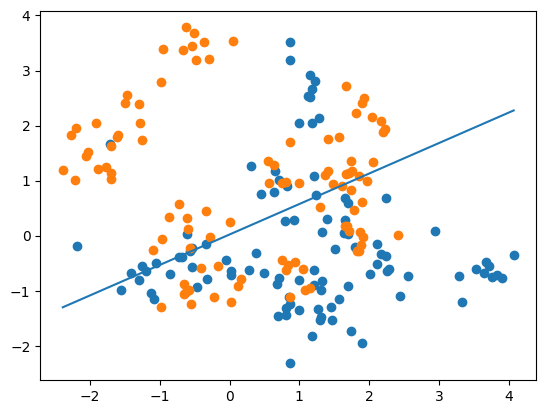

0.375


In [142]:
x = np.insert(x ,99 , x1 , axis = 0)
# print(np.size(x))
# making the response vector with values 1 and -1.
y = np.ones((200,1))
y[100:200 , 0] = -1
# adding ones column to the first column
ones = np.ones((1,200))
x = np.insert(x,0 ,ones, axis = 1)
# print(np.size(x))
# Formulae for B = inv((x.T* x))*(x.T*y)

X = np. linalg. inv(np.matmul(x.T ,x)) # finding inv(x.T * x)
Y_ = np.matmul(x.T , y)
beta = np.matmul(X,Y_)
# print(beta)
u = np.linspace(np.min(x[: , 1]) , np.max(x[:, 1]) , 200) # setting the limit for the u variable
v = -(beta[0] + beta[1]*u)/beta[2]
plt.plot(u,v)
plt.scatter(x[0:100 , 1] , x[0:100 ,2])
plt.scatter(x[100:200 , 1] , x[100:200 ,2])
plt.show()

# calculating Training Error
miss_data = 0
Y  = np.empty((200,1))
for i in range(0,200):
    Y[i] = -(beta[0] + beta[1]*x[i][1])/beta[2]
    if Y[i] < 0 and y[i] == 1:
        miss_data += 1
    elif Y[i] >= 0 and y[i] == -1:
        miss_data += 1;
print(miss_data/200)

### Q3 Compute the classifier using k-nearest neighbor method, for k = 15. Plot the classifying curve and print the training error as mentioned in Q2.

Traning Eror: 0.235


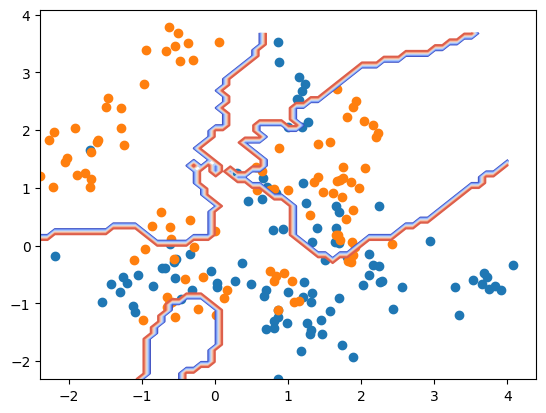

In [143]:
### KNN classifier
x = np.delete(x, 0, 1)
# print(x)
def Dist(x , y ):
    return ((x[0] - y[0])**2 + (x[1] - y[1])**2)
def knn(x,y, k,test = [1]):
    Y_predict = np.empty((200 ,1))
    size = len(test)
    Y_predict_test = np.empty((size ,1))
#     ## For calculating the miss classified data for the original data
    for i in range (0 , 200):
        distance = np.empty((200 ,2))
        for j in range (0,200):
            distance[j][0]  = Dist(x[i] , x[j])
            distance[j][1]  = j
        distance = distance[distance[:,0].argsort()]
        Y_predict[i] = 0
        for r in range (0 ,k):
            Y_predict[i] = Y_predict[i] + y[int(distance[r,1])]
            
        Y_predict[i] = Y_predict[i]/k
        
        if Y_predict[i] < 0:
            Y_predict[i] = -1
        else:
            Y_predict[i] = 1
    miss_data = 0 
    for i in range(0,200):
        if Y_predict[i] != y[i]:
            miss_data += 1
# c = knn(x,y, 1)
# ## Making the classifier for the randomly generated test data            
    if size != 1:
        for i in range(0,size):
            distance = np.empty((200,2))
            for j in range(0,200):
                distance[j , 0] = Dist(test[i], x[j])
                distance[j , 1] = j

            distance = distance[distance[:,0].argsort()]
            Y_predict_test[i] = 0
            for r in range(0,k):
                Y_predict_test[i] = Y_predict_test[i] + Y_predict[int(distance[r,1])] ### calculating on the basis of predicted data on training data
            Y_predict_test[i] = Y_predict_test[i] / k
            if Y_predict_test[i]< 0:
                Y_predict_test[i] = -1
            else:
                Y_predict_test[i] = 1  
    
    
    return miss_data/200 , Y_predict , Y_predict_test
# print(c[0] ,c[1])




### Function for plotting KNN 
def plot_knn(x,y,k):
    xc , yc=np.meshgrid(np.arange(x[: , 0].min() , x[:, 0].max() , 0.1),
                    np.arange(x[: , 1].min() , x[:,1].max() , 0.1))

    r = np.c_[xc.ravel(),yc.ravel()]
    z1, z2 , z3 = knn(x,y,k,r)
    print("Traning Eror:", z1)
    y_plot = z3.reshape(xc.shape)
    # print(y_plot)
    plt.contour(xc,yc,y_plot , cmap = 'coolwarm')
    plt.scatter(x[0:100 , 0] , x[0:100 ,1])
    plt.scatter(x[100:200 , 0] , x[100:200 ,1])
    plt.show()
plot_knn(x,y,15)

### Q4. Repeat Q3 with k = 1.

Traning Eror: 0.0


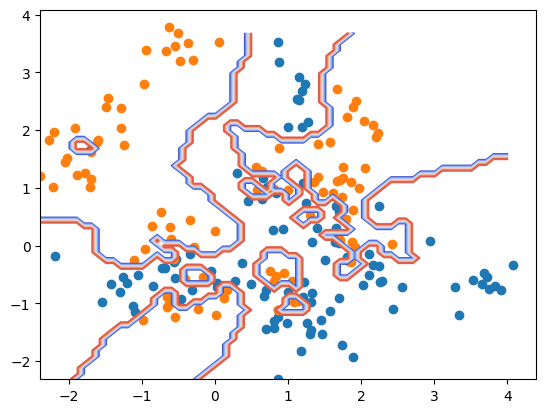

In [144]:
plot_knn(x,y,1)

### Q5. Generate 10000 test vectors as follows: Generate 5000 feature vectors as given in Q1(b) (i.e., 500 vectors for each mi), and label them all as (+1).1 Similarly, generate 5000 more feature vectors as mentioned in Q1(c) (i.e.,500 vectors per m′i), and label them all as (−1). Assume that the labelscorrespond to the true responses. Compute and print the test error based on the classifiers derived using (i) linear model, (ii) 15-NN, and (iii) 1-NN.

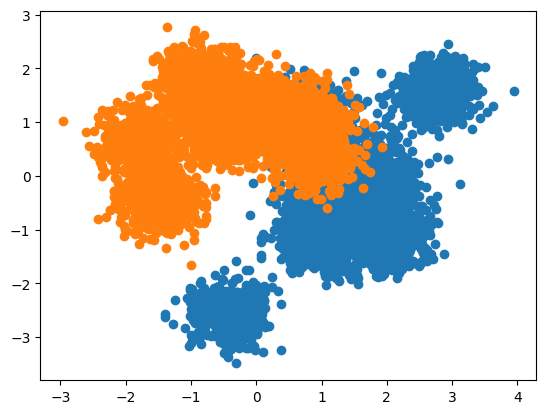

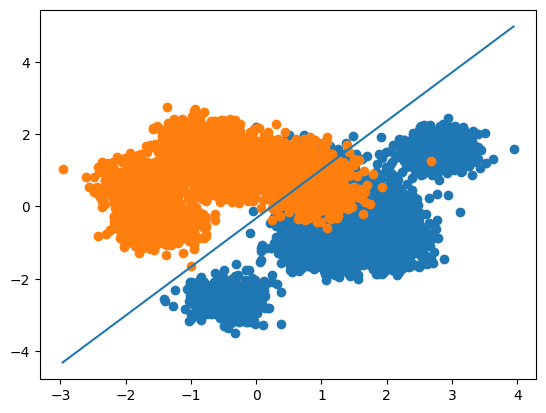

0.7652
Traning Eror: 0.0903


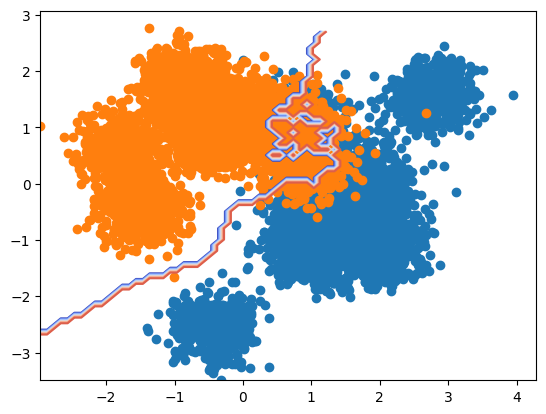

In [145]:
mean = [1, 0]
cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(mean, cov,10)
mean1 = [0,1]
m1 = np.random.multivariate_normal(mean1, cov, 10) # Another two dimensional vector with mean[0,1] and covariance same as above.
# print (m1)
cov1 = [[0.1 , 0], [0 , 0.1]]
x = np.empty((5000,2))
for i in range (0 , 10):
    x[i*500 : i*500 + 500] = np.random.multivariate_normal(m[i], cov1, 500)
x1 = np.empty((5000,2))
for i in range (0 , 10):
    x1[i*500 : i*500 + 500] = np.random.multivariate_normal(m1[i], cov1, 500)
plt.scatter(x[0:5000 , 0] , x[0:5000 ,1])
plt.scatter(x1[0:5000 , 0] , x1[0:10000 ,1])  
plt.show()


x = np.insert(x ,4999 , x1 , axis = 0)
# print(np.size(x))
# making the response vector with values 1 and -1.
y = np.ones((10000,1))
y[5000:10000 , 0] = -1
# adding ones column to the first column
ones = np.ones((1,10000))
x = np.insert(x,0 ,ones, axis = 1)
# print(np.size(x))
# Formulae for B = inv((x.T* x))*(x.T*y)

X = np. linalg. inv(np.matmul(x.T ,x)) # finding inv(x.T * x)
Y_ = np.matmul(x.T , y)
beta = np.matmul(X,Y_)
# print(beta)
u = np.linspace(np.min(x[: , 1]) , np.max(x[:, 1]) , 10000) # setting the limit for the u variable
v = -(beta[0] + beta[1]*u)/beta[2]
plt.plot(u,v)
plt.scatter(x[0:5000 , 1] , x[0:5000 ,2])
plt.scatter(x[5000:10000 , 1] , x[5000:10000 ,2])
plt.show()
x = np.delete(x, 0, 1)
# calculating Training Error
miss_data = 0
Y  = np.empty((10000,1))
for i in range(0,10000):
    Y[i] = -(beta[0] + beta[1]*x[i][1])/beta[2]
    if Y[i] < 0 and y[i] == 1:
        miss_data += 1
    elif Y[i] >= 0 and y[i] == -1:
        miss_data += 1;
print(miss_data/10000)

## knn()


def knn(x,y, k,test = [1]):
    Y_predict = np.empty((10000 ,1))
    size = len(test)
    Y_predict_test = np.empty((size ,1))
#     ## For calculating the miss classified data for the original data
    for i in range (0 , 10000):
        distance = np.empty((10000 ,2))
        for j in range (0,10000):
            distance[j][0]  = Dist(x[i] , x[j])
            distance[j][1]  = j
        distance = distance[distance[:,0].argsort()]
        Y_predict[i] = 0
        for r in range (0 ,k):
            Y_predict[i] = Y_predict[i] + y[int(distance[r,1])]
            
        Y_predict[i] = Y_predict[i]/k
        
        if Y_predict[i] < 0:
            Y_predict[i] = -1
        else:
            Y_predict[i] = 1
    miss_data = 0 
    for i in range(0,10000):
        if Y_predict[i] != y[i]:
            miss_data += 1
# c = knn(x,y, 1)
# ## Making the classifier for the randomly generated test data            
    if size != 1:
        for i in range(0,size):
            distance = np.empty((10000,2))
            for j in range(0,10000):
                distance[j , 0] = Dist(test[i], x[j])
                distance[j , 1] = j

            distance = distance[distance[:,0].argsort()]
            Y_predict_test[i] = 0
            for r in range(0,k):
                Y_predict_test[i] = Y_predict_test[i] + Y_predict[int(distance[r,1])] ### calculating on the basis of predicted data on training data
            Y_predict_test[i] = Y_predict_test[i] / k
            if Y_predict_test[i]< 0:
                Y_predict_test[i] = -1
            else:
                Y_predict_test[i] = 1  
    
    
    return miss_data/10000 , Y_predict , Y_predict_test
# print(c[0] ,c[1])




### Function for plotting KNN 
def plot_knn(x,y,k):
    xc , yc=np.meshgrid(np.arange(x[: , 0].min() , x[:, 0].max() , 0.1),
                    np.arange(x[: , 1].min() , x[:,1].max() , 0.1))

    r = np.c_[xc.ravel(),yc.ravel()]
    z1, z2 , z3 = knn(x,y,k,r)
    print("Traning Eror:", z1)
    y_plot = z3.reshape(xc.shape)
    # print(y_plot)
    plt.contour(xc,yc,y_plot , cmap = 'coolwarm')
    plt.scatter(x[0:5000 , 0] , x[0:5000 ,1])
    plt.scatter(x[5000:10000 , 0] , x[5000:10000 ,1])
    plt.show()
plot_knn(x,y,15)

Traning Eror: 0.0


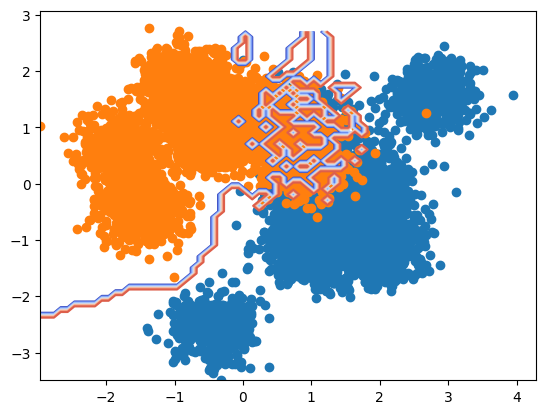

In [146]:
plot_knn(x,y,1)